In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models

In [50]:
df = pd.read_csv("/content/drive/MyDrive/2025-2 MLP/source/breast_cancer.csv")
df

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [51]:
df.isnull().sum()

,0
Unnamed: 0,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0


In [52]:
x = df.drop("label", axis=1)
y = df["label"]
x, y

(     Unnamed: 0  mean radius  mean texture  mean perimeter  mean area  \
 0             0        17.99         10.38          122.80     1001.0   
 1             1        20.57         17.77          132.90     1326.0   
 2             2        19.69         21.25          130.00     1203.0   
 3             3        11.42         20.38           77.58      386.1   
 4             4        20.29         14.34          135.10     1297.0   
 ..          ...          ...           ...             ...        ...   
 564         564        21.56         22.39          142.00     1479.0   
 565         565        20.13         28.25          131.20     1261.0   
 566         566        16.60         28.08          108.30      858.1   
 567         567        20.60         29.33          140.10     1265.0   
 568         568         7.76         24.54           47.92      181.0   
 
      mean smoothness  mean compactness  mean concavity  mean concave points  \
 0            0.11840         

In [53]:
Y = pd.get_dummies(y).values
Y

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [ True, False],
       [ True, False],
       [False,  True]])

In [54]:
X = x.values
X

array([[0.000e+00, 1.799e+01, 1.038e+01, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [1.000e+00, 2.057e+01, 1.777e+01, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [2.000e+00, 1.969e+01, 2.125e+01, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [5.660e+02, 1.660e+01, 2.808e+01, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [5.670e+02, 2.060e+01, 2.933e+01, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [5.680e+02, 7.760e+00, 2.454e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [55]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [56]:
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")   # 클래스 수 맞춤
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5874 - loss: 214.5592 - val_accuracy: 0.1648 - val_loss: 32.6447
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4512 - loss: 22.2587 - val_accuracy: 0.7802 - val_loss: 4.4994
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7825 - loss: 7.7623 - val_accuracy: 0.8352 - val_loss: 4.1970
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7684 - loss: 5.4911 - val_accuracy: 0.8242 - val_loss: 4.4483
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7654 - loss: 6.2410 - val_accuracy: 0.8352 - val_loss: 3.9052
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7795 - loss: 5.6229 - val_accuracy: 0.8242 - val_loss: 3.2922
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7570 - loss: 5.5365 - val_accuracy: 0.8571 - val_loss: 1.9654
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7935 - loss: 4.2048 - val_accuracy: 0.8571 - val_loss: 1.

In [57]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [58]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


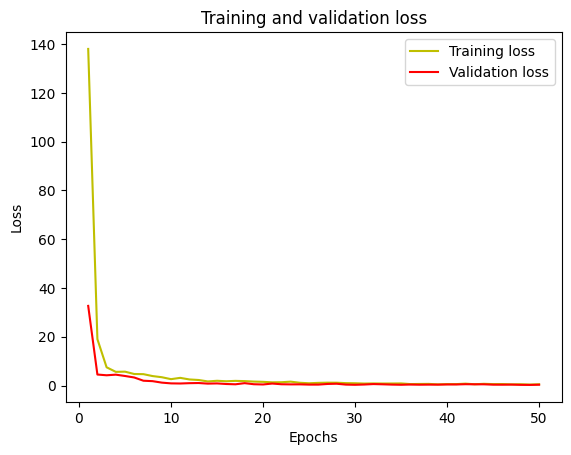

In [59]:
loss = history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

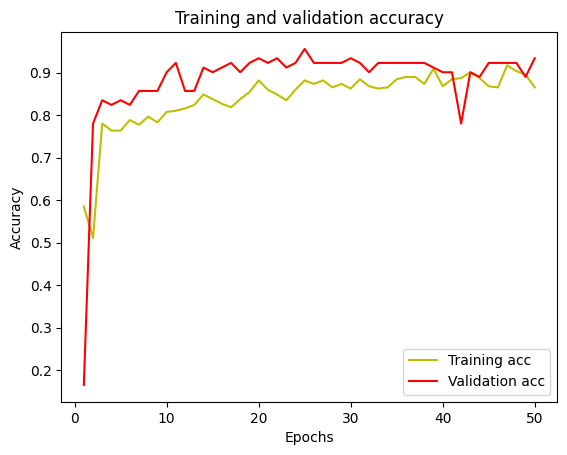

In [60]:
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [61]:
print(classification_report(y_test_class,y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        47
           1       0.92      0.99      0.95        67

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114

[[41  6]
 [ 1 66]]
